In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/Omnify-Analyst-Intership-Task.xlsx'

# Read Google Ads Data sheet
google_ads_df = pd.read_excel(file_path, sheet_name='Google Ads Data')

# Read Listing Site Data sheet
listing_site_df = pd.read_excel(file_path, sheet_name='Listing Site Data')

In [ ]:
# Convert the 'Date of Report' column to datetime type for proper date manipulation
listing_site_df['Date of Report'] = pd.to_datetime(listing_site_df['Date of Report'])
google_ads_df['Week'] = pd.to_datetime(google_ads_df['Week'])

In [ ]:
# Calculate weekly metrics
weekly_listing_site_df = listing_site_df.resample('W', on='Date of Report').sum()
weekly_google_ads_df = google_ads_df.resample('W', on='Week').sum()

<ipython-input-4-d5262785e7b1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_listing_site_df = listing_site_df.resample('W', on='Date of Report').sum()
<ipython-input-4-d5262785e7b1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_google_ads_df = google_ads_df.resample('W', on='Week').sum()


In [ ]:
# Calculate monthly metrics
monthly_listing_site_df = listing_site_df.resample('M', on='Date of Report').sum()
monthly_google_ads_df = google_ads_df.resample('M', on='Week').sum()

<ipython-input-5-717a76a3f158>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_listing_site_df = listing_site_df.resample('M', on='Date of Report').sum()
<ipython-input-5-717a76a3f158>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_google_ads_df = google_ads_df.resample('M', on='Week').sum()


In [ ]:
# Calculate Returns %
weekly_google_ads_df['Returns %'] = (weekly_google_ads_df['Leads'] / weekly_google_ads_df['Prospects']) * 100
monthly_google_ads_df['Returns %'] = (monthly_google_ads_df['Leads'] / monthly_google_ads_df['Prospects']) * 100

In [ ]:

# Calculate Total Spends (combining spends from both sheets)
weekly_total_spends = weekly_listing_site_df['Money Spent ($)'] + weekly_google_ads_df['Cost ($)']
monthly_total_spends = monthly_listing_site_df['Money Spent ($)'] + monthly_google_ads_df['Cost ($)']


In [ ]:
# Create the combined report
weekly_combined_report = pd.DataFrame({
    'Date': weekly_listing_site_df.index,
    'Total Spends ($)': weekly_total_spends,
    'Returns %': weekly_google_ads_df['Returns %']
})

monthly_combined_report = pd.DataFrame({
    'Month': monthly_listing_site_df.index,
    'Total Spends ($)': monthly_total_spends,
    'Returns %': monthly_google_ads_df['Returns %']
})

In [ ]:

# Print the combined reports
print("Weekly Combined Report:")
print(weekly_combined_report)

print("\nMonthly Combined Report:")
print(monthly_combined_report)

Weekly Combined Report:
                 Date  Total Spends ($)   Returns %
2020-10-25 2020-10-25               NaN         NaN
2020-11-01 2020-11-01               NaN         NaN
2020-11-08 2020-11-08               NaN         NaN
2020-11-15 2020-11-15               NaN         NaN
2020-11-22 2020-11-22               NaN         NaN
2020-11-29 2020-11-29               NaN         NaN
2020-12-06 2020-12-06               NaN         NaN
2020-12-13 2020-12-13               NaN         NaN
2020-12-20 2020-12-20               NaN         NaN
2020-12-27 2020-12-27               NaN         NaN
2021-01-03 2021-01-03               NaN         NaN
2021-01-10 2021-01-10               NaN         NaN
2021-01-17 2021-01-17               NaN         NaN
2021-01-24 2021-01-24               NaN         NaN
2021-01-31 2021-01-31            540.79   50.000000
2021-02-07 2021-02-07           1435.58    0.000000
2021-02-14 2021-02-14           1891.38    0.000000
2021-02-21 2021-02-21           1338.30 

In [ ]:
weekly_combined_reportt = weekly_google_ads_df['Returns %']

# Display the extracted data (optional)
print(weekly_combined_report)

                 Date  Total Spends ($)   Returns %
2020-10-25 2020-10-25               NaN         NaN
2020-11-01 2020-11-01               NaN         NaN
2020-11-08 2020-11-08               NaN         NaN
2020-11-15 2020-11-15               NaN         NaN
2020-11-22 2020-11-22               NaN         NaN
2020-11-29 2020-11-29               NaN         NaN
2020-12-06 2020-12-06               NaN         NaN
2020-12-13 2020-12-13               NaN         NaN
2020-12-20 2020-12-20               NaN         NaN
2020-12-27 2020-12-27               NaN         NaN
2021-01-03 2021-01-03               NaN         NaN
2021-01-10 2021-01-10               NaN         NaN
2021-01-17 2021-01-17               NaN         NaN
2021-01-24 2021-01-24               NaN         NaN
2021-01-31 2021-01-31            540.79   50.000000
2021-02-07 2021-02-07           1435.58    0.000000
2021-02-14 2021-02-14           1891.38    0.000000
2021-02-21 2021-02-21           1338.30    0.000000
2021-02-28 2

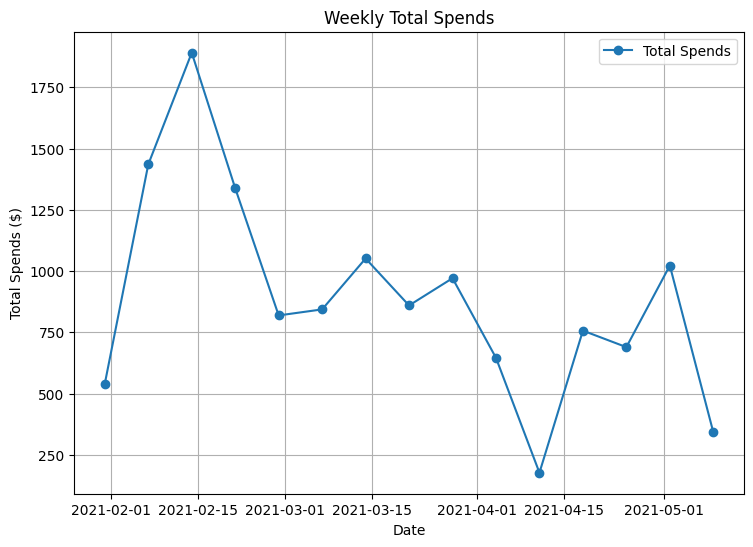

In [ ]:
# Visualize the data
plt.figure(figsize=(19, 6))

# Weekly Combined Report Visualization
plt.subplot(1, 2, 1)
plt.plot(weekly_combined_report['Date'], weekly_combined_report['Total Spends ($)'], label='Total Spends', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Spends ($)')
plt.title('Weekly Total Spends')
plt.grid(True)
plt.legend()



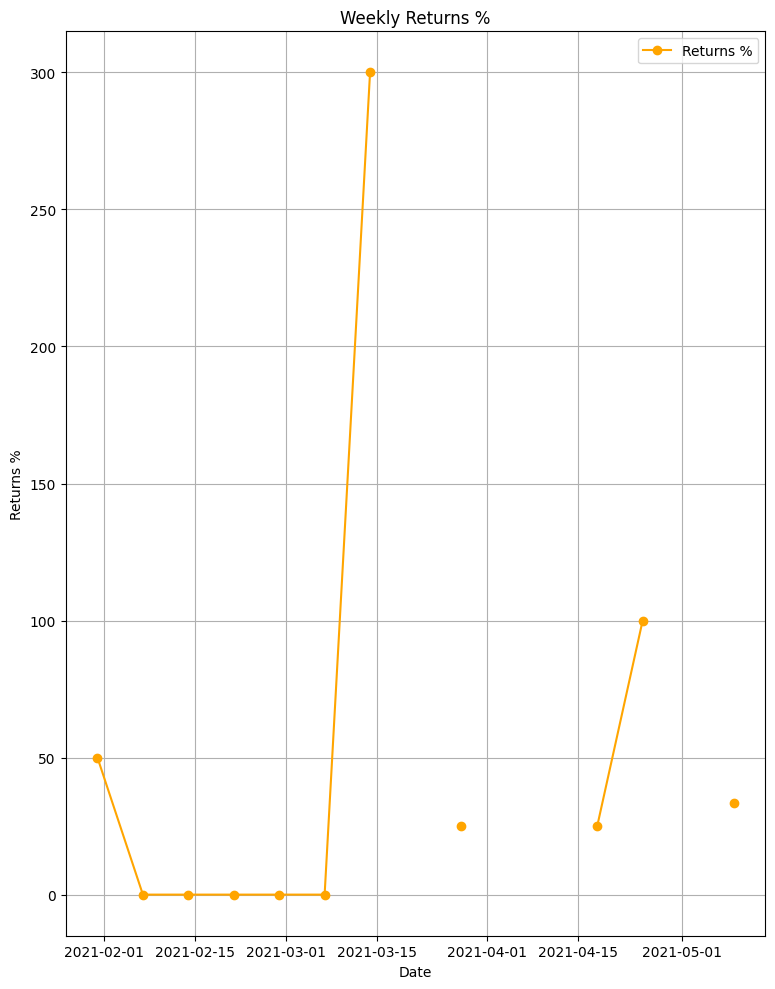

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
plt.plot(weekly_combined_report['Date'], weekly_combined_report['Returns %'], label='Returns %', marker='o', color='orange')
plt.xlabel('Date')
plt.ylabel('Returns %')
plt.title('Weekly Returns %')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

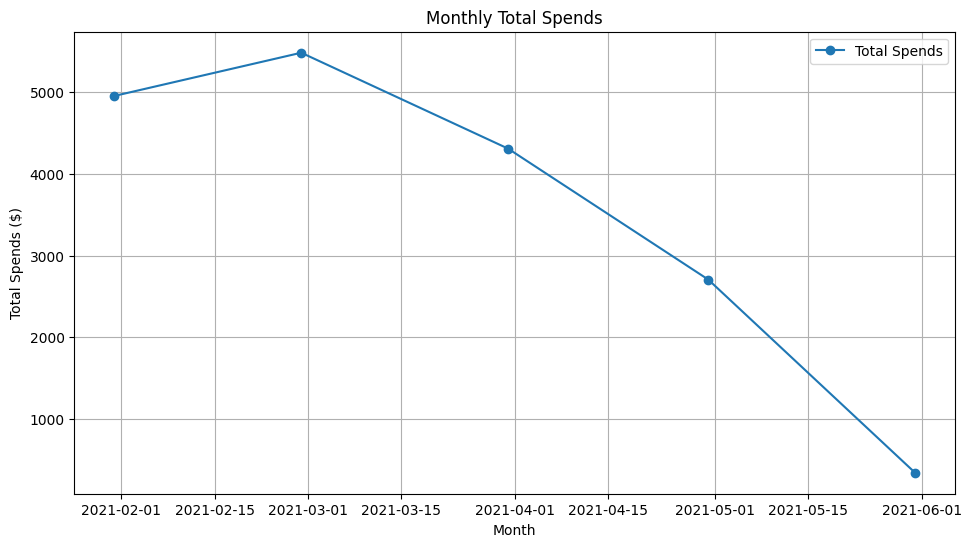

In [ ]:
# Monthly Combined Report Visualization
plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
plt.plot(monthly_combined_report['Month'], monthly_combined_report['Total Spends ($)'], label='Total Spends', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Spends ($)')
plt.title('Monthly Total Spends')
plt.grid(True)
plt.legend()


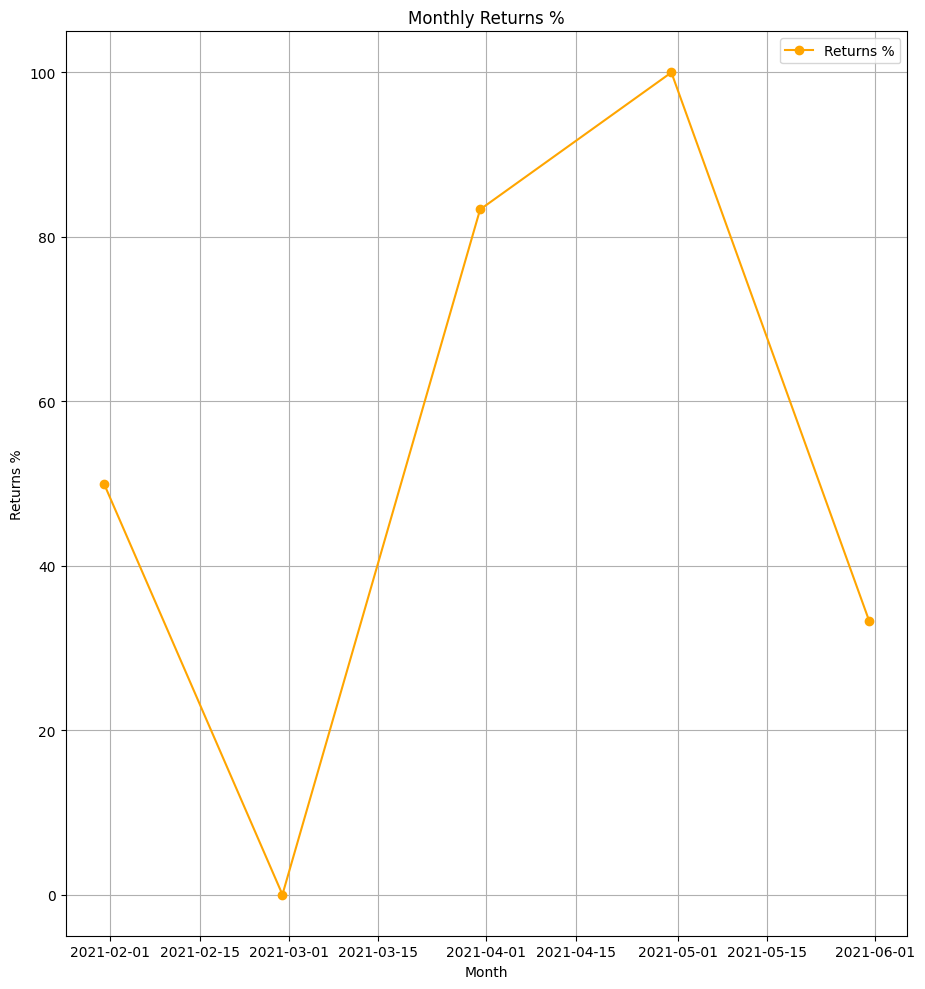

In [ ]:
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 2)
plt.plot(monthly_combined_report['Month'], monthly_combined_report['Returns %'], label='Returns %', marker='o', color='orange')
plt.xlabel('Month')
plt.ylabel('Returns %')
plt.title('Monthly Returns %')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Calculate Returns % for each channel, excluding missing or NaN values
listing_site_df['Returns %'] = (listing_site_df['Leads'] / listing_site_df['Prospects']) * 100

In [ ]:
# Drop rows with missing or NaN values in the 'Returns %' column
listing_site_df.dropna(subset=['Returns %'], inplace=True)


In [ ]:
# Validate data in the 'Returns %' column
if not listing_site_df['Returns %'].dtype == 'float64':
    raise ValueError("The 'Returns %' column contains non-numeric data.")

In [ ]:
# Calculate Total Returns for each channel
channel_returns = listing_site_df.groupby('Channel')['Returns %'].mean()

In [ ]:
# Find the most profitable channel
most_profitable_channel = channel_returns.idxmax()

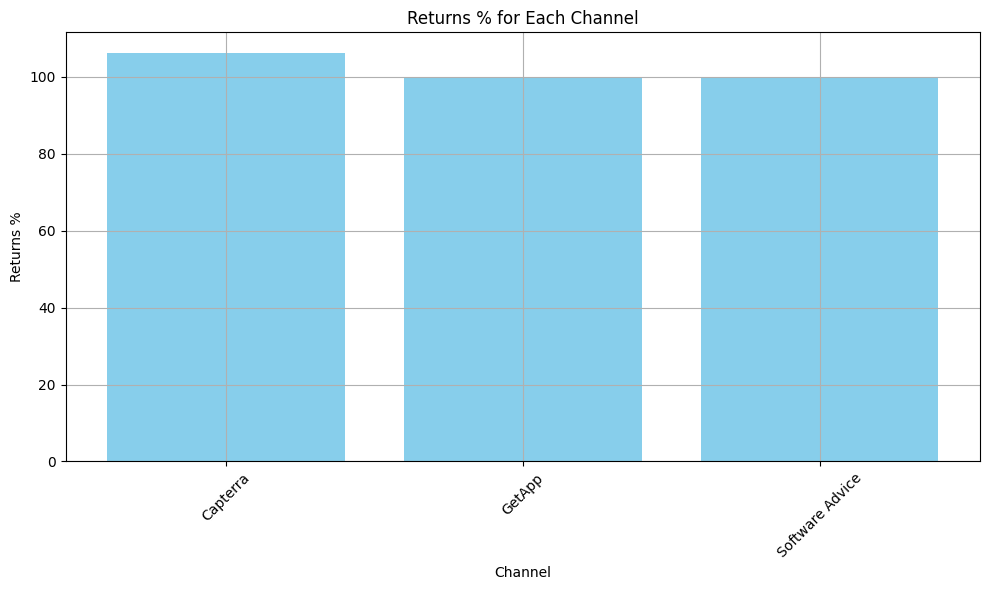

The most profitable channel is: Capterra


In [ ]:
# Visualize the Returns % for each channel
plt.figure(figsize=(10, 6))
plt.bar(channel_returns.index, channel_returns.values, color='skyblue')
plt.xlabel('Channel')
plt.ylabel('Returns %')
plt.title('Returns % for Each Channel')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"The most profitable channel is: {most_profitable_channel}")

In [ ]:
# Calculate Returns % for each channel in the listing site data, excluding missing or NaN values
listing_site_df['Returns %'] = (listing_site_df['Leads'] / listing_site_df['Prospects']) * 100
listing_site_df.dropna(subset=['Returns %'], inplace=True)

In [ ]:
# Calculate Returns % for each keyword in Google Ads data, excluding missing or NaN values
google_ads_df['Returns %'] = (google_ads_df['Leads'] / google_ads_df['Prospects']) * 100
google_ads_df.dropna(subset=['Returns %'], inplace=True)

In [ ]:
# Calculate Average Returns % for each category in the listing site data
category_returns = listing_site_df.groupby('Categories')['Returns %'].mean()

In [ ]:
# Calculate Average Returns % for each keyword in Google Ads data
keyword_returns = google_ads_df.groupby('Search Keyword')['Returns %'].mean()

In [ ]:

# Find the most profitable category and keyword
most_profitable_category = category_returns.idxmax()
most_profitable_keyword = keyword_returns.idxmax()

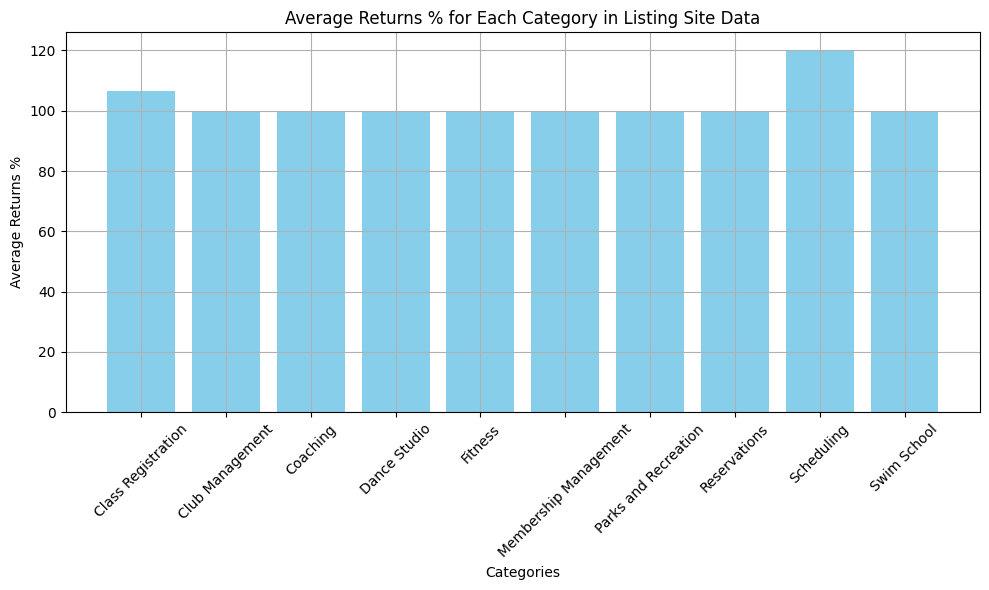

In [ ]:
# Visualize the Average Returns % for each category in the listing site data
plt.figure(figsize=(10, 6))
plt.bar(category_returns.index, category_returns.values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Average Returns %')
plt.title('Average Returns % for Each Category in Listing Site Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

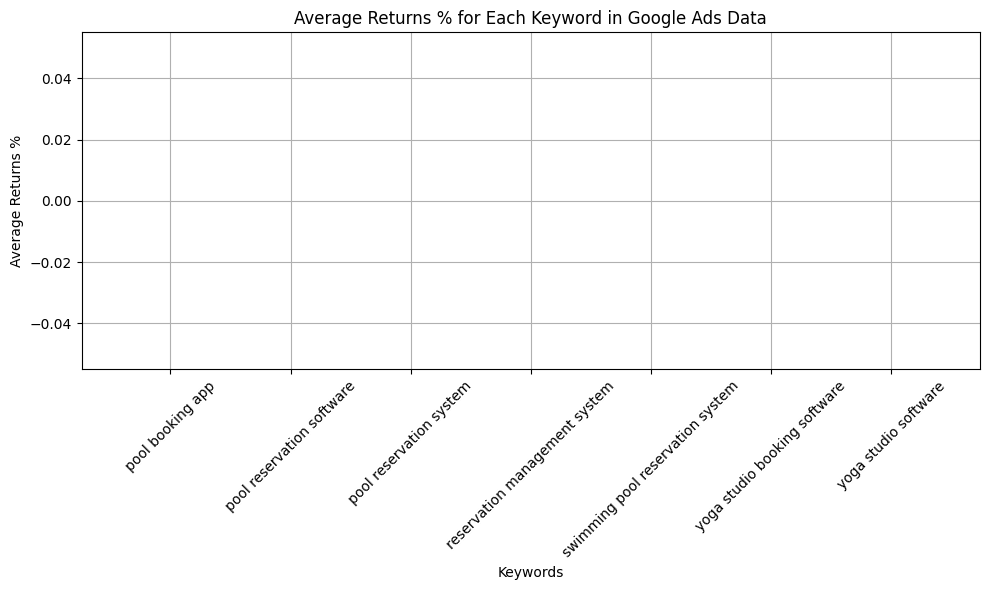

In [ ]:
# Visualize the Average Returns % for each keyword in Google Ads data
plt.figure(figsize=(10, 6))
plt.bar(keyword_returns.index, keyword_returns.values, color='orange')
plt.xlabel('Keywords')
plt.ylabel('Average Returns %')
plt.title('Average Returns % for Each Keyword in Google Ads Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(f"The most profitable category in the listing site is: {most_profitable_category}")
print(f"The most profitable keyword in Google Ads is: {most_profitable_keyword}")

The most profitable category in the listing site is: Scheduling
The most profitable keyword in Google Ads is: swimming pool reservation system


In [ ]:
# Convert date columns to datetime type for proper time series analysis
google_ads_df['Week'] = pd.to_datetime(google_ads_df['Week'])
listing_site_df['Date of Report'] = pd.to_datetime(listing_site_df['Date of Report'])

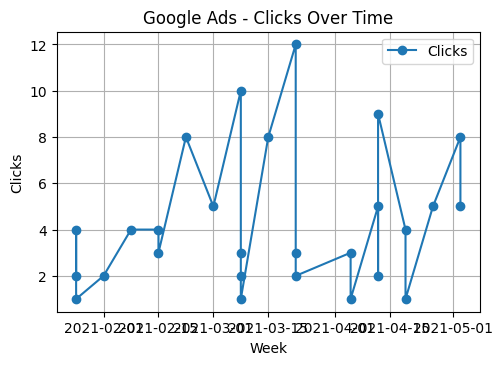

In [ ]:
# Plot time series data for Google Ads
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(google_ads_df['Week'], google_ads_df['Clicks'], label='Clicks', marker='o')
plt.xlabel('Week')
plt.ylabel('Clicks')
plt.title('Google Ads - Clicks Over Time')
plt.grid(True)
plt.legend()

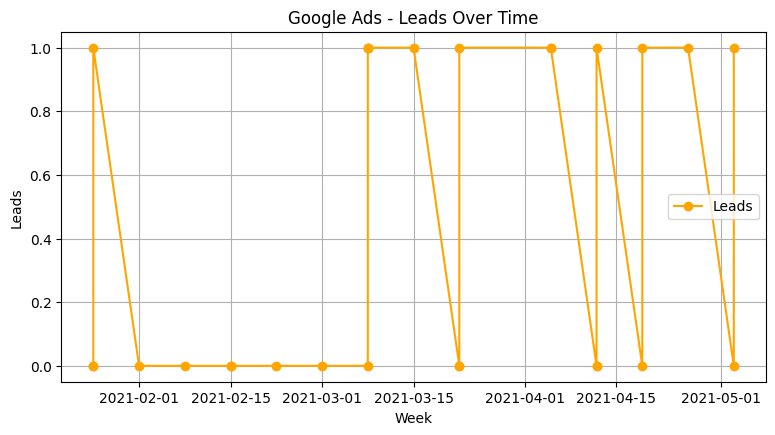

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 2)
plt.plot(google_ads_df['Week'], google_ads_df['Leads'], label='Leads', marker='o', color='orange')
plt.xlabel('Week')
plt.ylabel('Leads')
plt.title('Google Ads - Leads Over Time')
plt.grid(True)
plt.legend()

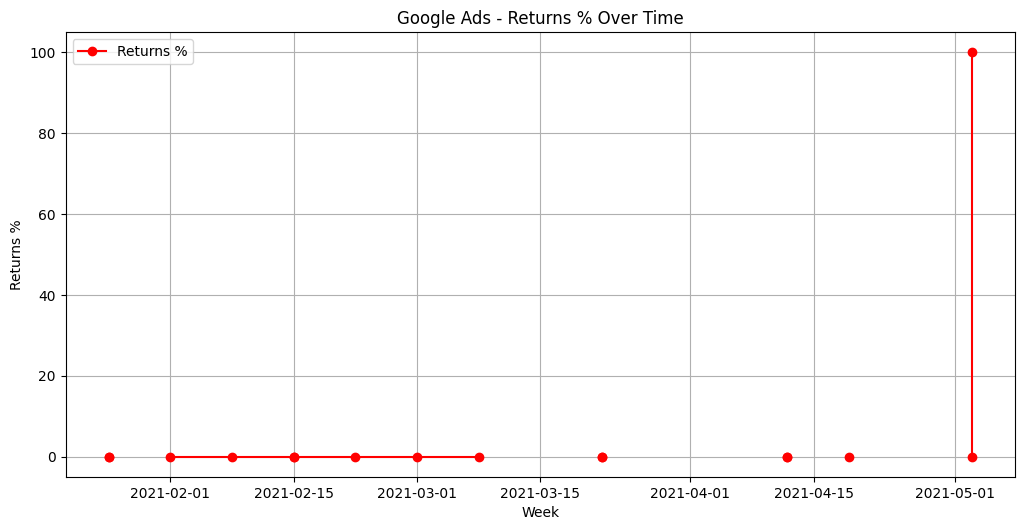

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 4)
plt.plot(google_ads_df['Week'], google_ads_df['Returns %'], label='Returns %', marker='o', color='red')
plt.xlabel('Week')
plt.ylabel('Returns %')
plt.title('Google Ads - Returns % Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()

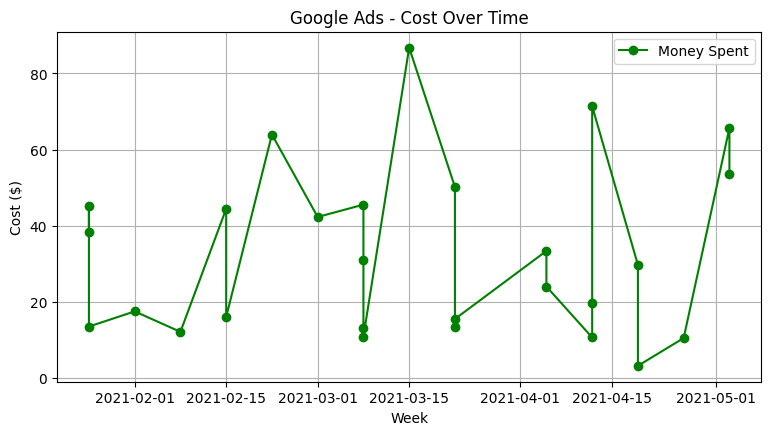

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
plt.plot(google_ads_df['Week'], google_ads_df['Cost ($)'], label='Money Spent', marker='o', color='green')
plt.xlabel('Week')
plt.ylabel('Cost ($)')
plt.title('Google Ads - Cost Over Time')
plt.grid(True)
plt.legend()

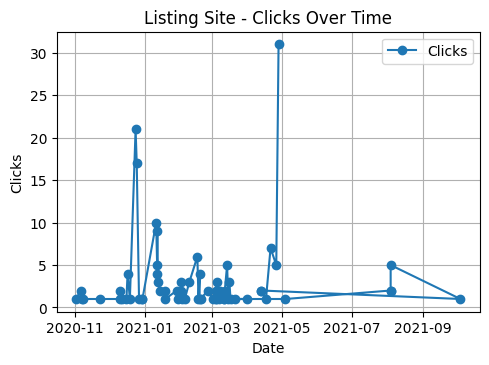

In [ ]:
# Plot time series data for the listing site
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(listing_site_df['Date of Report'], listing_site_df['Clicks'], label='Clicks', marker='o')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.title('Listing Site - Clicks Over Time')
plt.grid(True)
plt.legend()


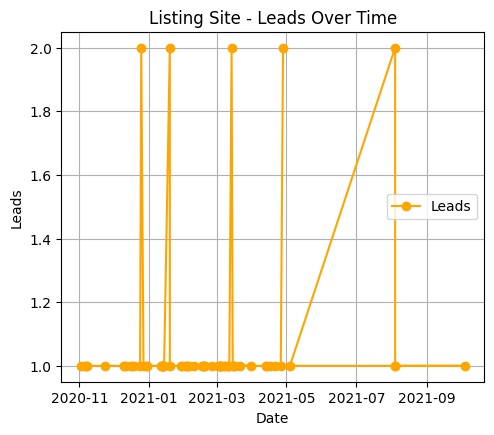

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 2)
plt.plot(listing_site_df['Date of Report'], listing_site_df['Leads'], label='Leads', marker='o', color='orange')
plt.xlabel('Date')
plt.ylabel('Leads')
plt.title('Listing Site - Leads Over Time')
plt.grid(True)
plt.legend()

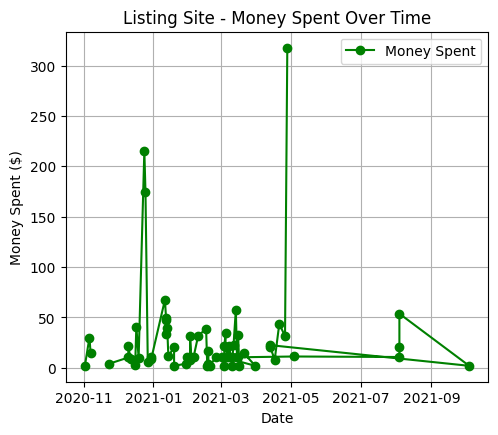

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
plt.plot(listing_site_df['Date of Report'], listing_site_df['Money Spent ($)'], label='Money Spent', marker='o', color='green')
plt.xlabel('Date')
plt.ylabel('Money Spent ($)')
plt.title('Listing Site - Money Spent Over Time')
plt.grid(True)
plt.legend()

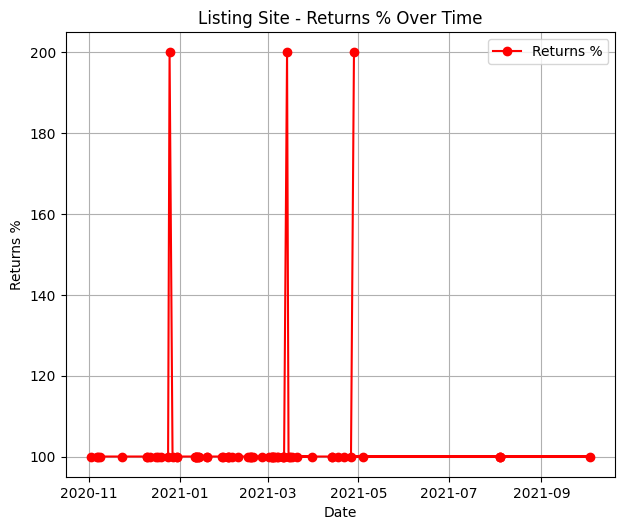

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 4)
plt.plot(listing_site_df['Date of Report'], listing_site_df['Returns %'], label='Returns %', marker='o', color='red')
plt.xlabel('Date')
plt.ylabel('Returns %')
plt.title('Listing Site - Returns % Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()

In [ ]:

# Analyze the impact of geography on the listing site
listing_site_geo_data = listing_site_df.groupby('Location').agg({
    'Clicks': 'sum',
    'Leads': 'sum',
    'Money Spent ($)': 'sum',
    'Returns %': 'mean'
}).reset_index()

In [ ]:
# Analyze the impact of geography on Google Ads
google_ads_geo_data = google_ads_df.groupby('Country').agg({
    'Clicks': 'sum',
    'Leads': 'sum',
    'Cost ($)': 'sum',
    'Returns %': 'mean'
}).reset_index()

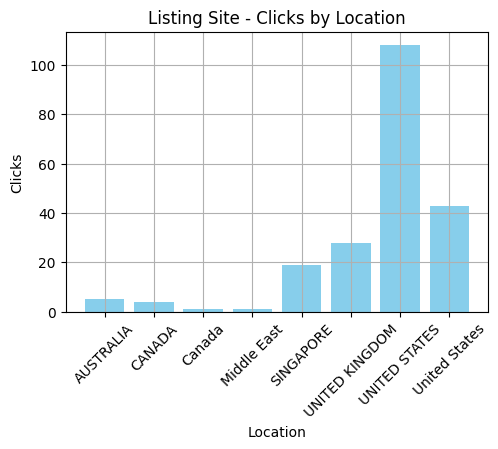

In [ ]:
# Visualize the impact of geography on the listing site
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(listing_site_geo_data['Location'], listing_site_geo_data['Clicks'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Clicks')
plt.title('Listing Site - Clicks by Location')
plt.xticks(rotation=45)
plt.grid(True)


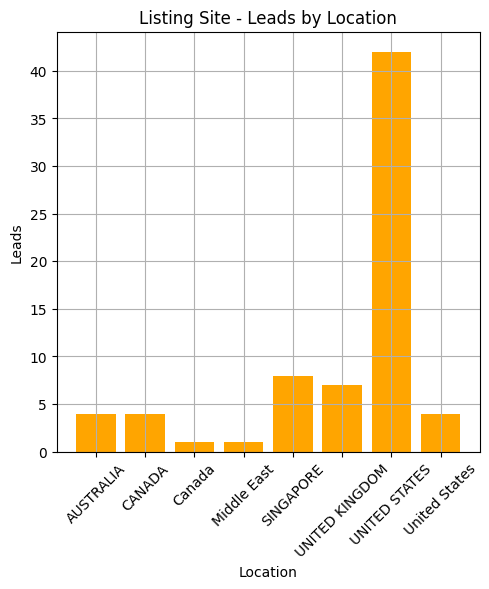

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 2)
plt.bar(listing_site_geo_data['Location'], listing_site_geo_data['Leads'], color='orange')
plt.xlabel('Location')
plt.ylabel('Leads')
plt.title('Listing Site - Leads by Location')
plt.xticks(rotation=45)
plt.grid(True)

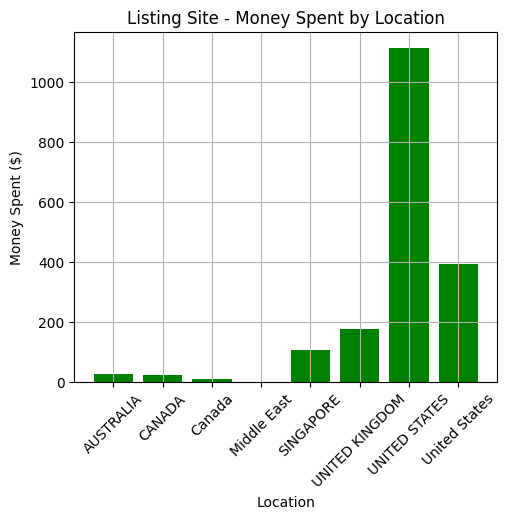

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
plt.bar(listing_site_geo_data['Location'], listing_site_geo_data['Money Spent ($)'], color='green')
plt.xlabel('Location')
plt.ylabel('Money Spent ($)')
plt.title('Listing Site - Money Spent by Location')
plt.xticks(rotation=45)
plt.grid(True)

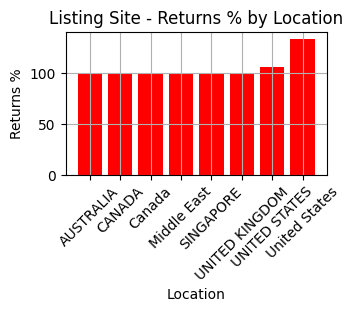

In [ ]:
plt.subplot(2, 2, 4)
plt.bar(listing_site_geo_data['Location'], listing_site_geo_data['Returns %'], color='red')
plt.xlabel('Location')
plt.ylabel('Returns %')
plt.title('Listing Site - Returns % by Location')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()

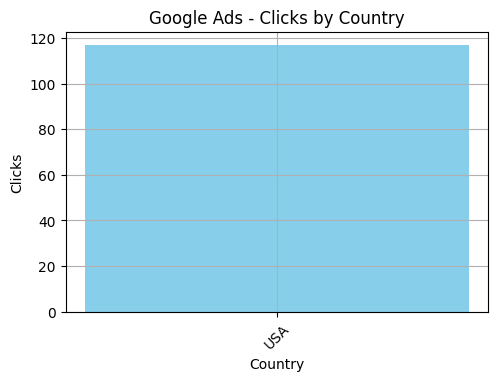

In [ ]:
# Visualize the impact of geography on Google Ads
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(google_ads_geo_data['Country'], google_ads_geo_data['Clicks'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Clicks')
plt.title('Google Ads - Clicks by Country')
plt.xticks(rotation=45)
plt.grid(True)

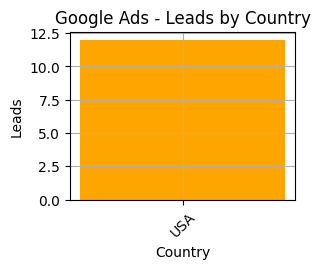

In [ ]:
plt.subplot(2, 2, 2)
plt.bar(google_ads_geo_data['Country'], google_ads_geo_data['Leads'], color='orange')
plt.xlabel('Country')
plt.ylabel('Leads')
plt.title('Google Ads - Leads by Country')
plt.xticks(rotation=45)
plt.grid(True)

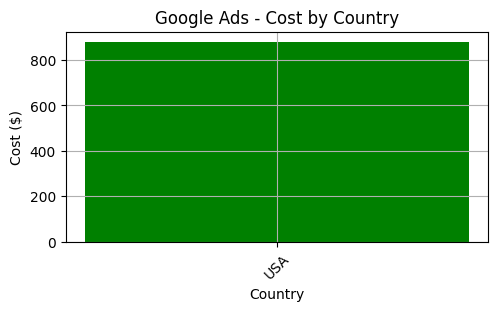

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
plt.bar(google_ads_geo_data['Country'], google_ads_geo_data['Cost ($)'], color='green')
plt.xlabel('Country')
plt.ylabel('Cost ($)')
plt.title('Google Ads - Cost by Country')
plt.xticks(rotation=45)
plt.grid(True)

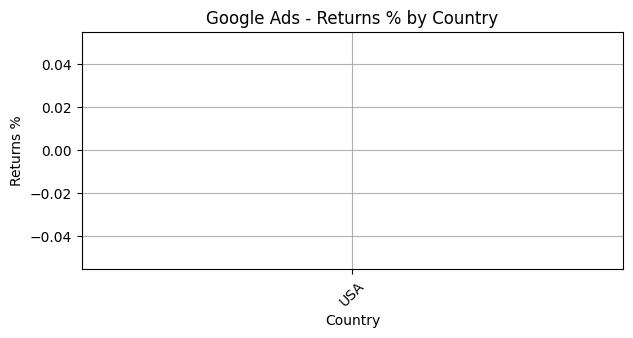

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 4)
plt.bar(google_ads_geo_data['Country'], google_ads_geo_data['Returns %'], color='red')
plt.xlabel('Country')
plt.ylabel('Returns %')
plt.title('Google Ads - Returns % by Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

In [ ]:

# Pivot table for average Clicks per Channel in the listing site data
pivot_table_clicks_listing = listing_site_df.pivot_table(values='Clicks', index='Channel', aggfunc='mean')


In [ ]:

# Pivot table for average Clicks per Channel in the listing site data
pivot_table_clicks_listing = listing_site_df.pivot_table(values='Clicks', index='Channel', aggfunc='mean')


In [ ]:
# Pivot table for average Money Spent per Campaign and Ad group in Google Ads data
pivot_table_Cost_of_google = google_ads_df.pivot_table(values='Cost ($)', index=['Campaign', 'Ad group'], aggfunc='mean')


In [ ]:
# Pivot table for total Clicks per Week in Google Ads data
pivot_table_clicks_google = google_ads_df.pivot_table(values='Clicks', index='Week', aggfunc='sum')


In [ ]:
# Pivot table for total Leads per Location in the listing site data
pivot_table_leads_listing = listing_site_df.pivot_table(values='Leads', index='Location', aggfunc='sum')


In [ ]:
# Pivot table for Returns % per Campaign in Google Ads data
pivot_table_returns_google = google_ads_df.pivot_table(values='Returns %', index='Campaign', aggfunc='mean')


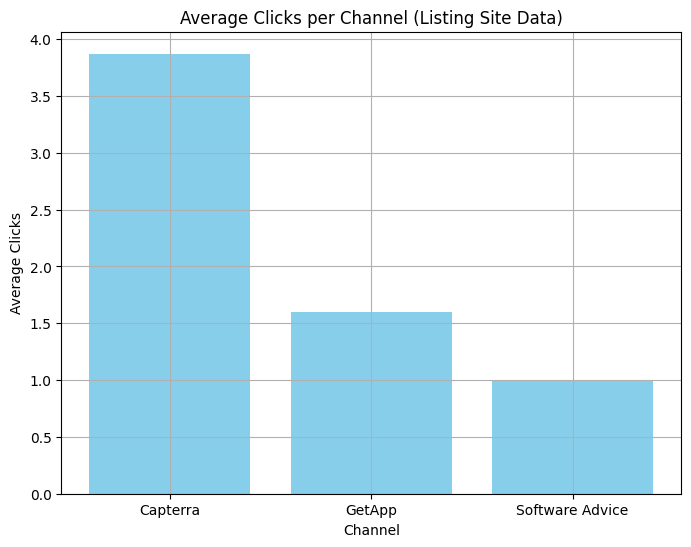

In [ ]:
# Visualize average Clicks per Channel in the listing site data
plt.figure(figsize=(8, 6))
plt.bar(pivot_table_clicks_listing.index, pivot_table_clicks_listing['Clicks'], color='skyblue')
plt.xlabel('Channel')
plt.ylabel('Average Clicks')
plt.title('Average Clicks per Channel (Listing Site Data)')
plt.grid(True)
plt.show()

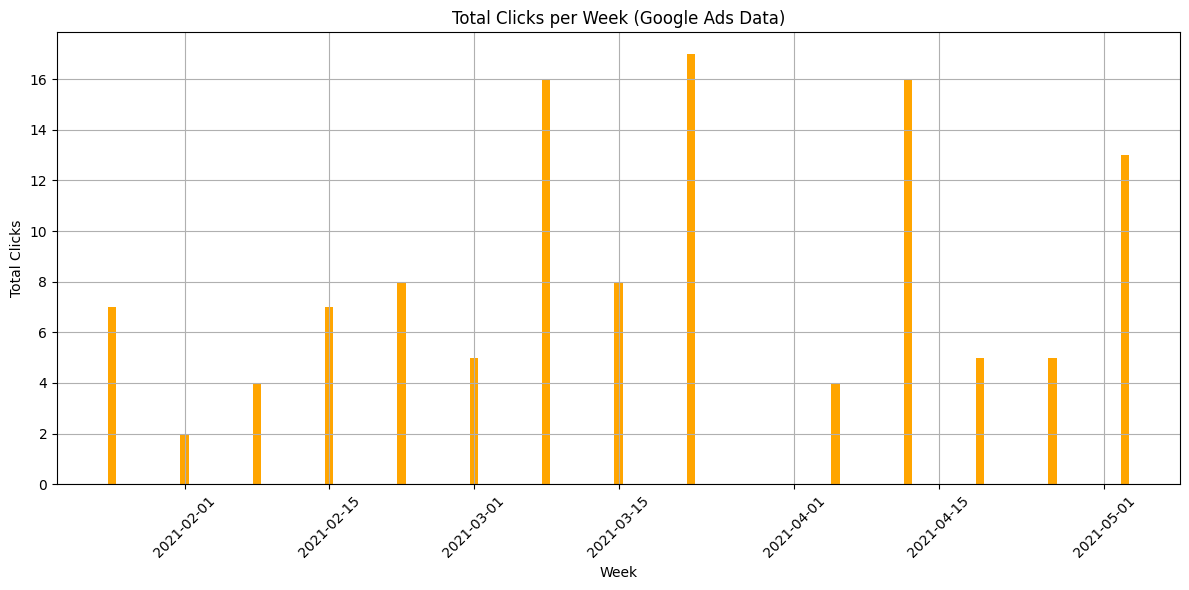

In [ ]:
# Visualize total Clicks per Week in Google Ads data
plt.figure(figsize=(12, 6))
plt.bar(pivot_table_clicks_google.index, pivot_table_clicks_google['Clicks'], color='orange')
plt.xlabel('Week')
plt.ylabel('Total Clicks')
plt.title('Total Clicks per Week (Google Ads Data)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


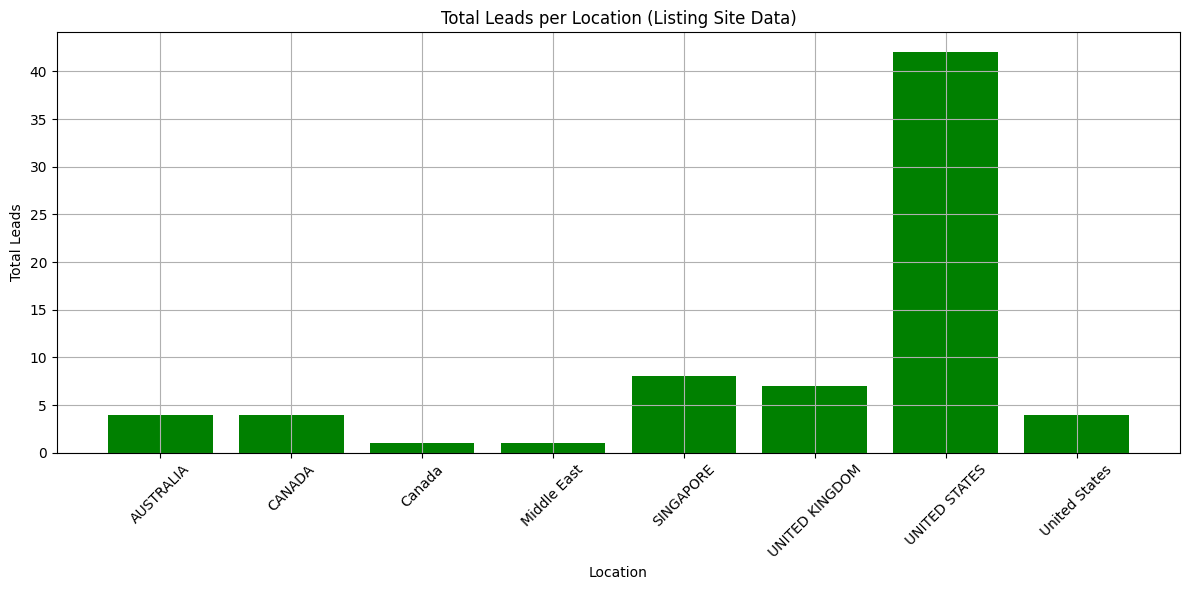

In [ ]:
# Visualize total Leads per Location in the listing site data
plt.figure(figsize=(12, 6))
plt.bar(pivot_table_leads_listing.index, pivot_table_leads_listing['Leads'], color='green')
plt.xlabel('Location')
plt.ylabel('Total Leads')
plt.title('Total Leads per Location (Listing Site Data)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

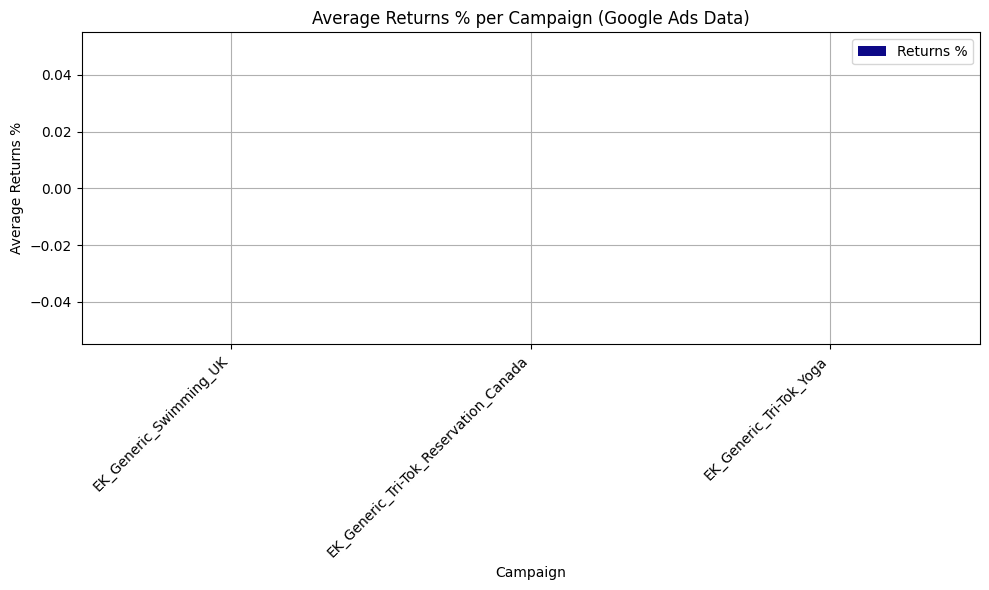

In [ ]:
# Visualize Returns % per Campaign in Google Ads data
pivot_table_returns_google.plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.xlabel('Campaign')
plt.ylabel('Average Returns %')
plt.title('Average Returns % per Campaign (Google Ads Data)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()